### Import Libraries

In [97]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    f1_score, classification_report, confusion_matrix,
    roc_curve, auc, accuracy_score
)
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
from catboost import CatBoostClassifier
import joblib

### Data Preperation

In [3]:
embedded_df = pd.read_csv("embedded_df.csv").values

In [81]:
if isinstance(embedded_df, np.ndarray):
    columns = [f"{i}" for i in range(768)] + ["label_16", "E", "N", "T", "P"]
    embedded_df = pd.DataFrame(embedded_df, columns=columns)

for col in ["label_16", "E", "N", "T", "P"]:
    embedded_df[col] = embedded_df[col].astype(int)

In [83]:
embedded_df.head()

,0,1,2,3,4,5,6,7,8,9,...,763,764,765,766,767,label_16,E,N,T,P
0,0.113737,0.192483,-0.229517,-0.472719,-0.397044,-0.122304,0.423930,0.246704,0.258519,-0.580717,...,-0.044857,-0.008182,-0.031279,0.452753,0.684813,0,1,1,0,0
1,-0.543928,-0.568359,0.167787,0.276629,-0.259777,-0.147880,0.610255,0.273758,-0.072039,-0.070248,...,0.135308,-0.163897,-0.429514,0.339468,0.483462,0,1,1,0,0
2,-0.042696,-0.161750,0.412878,-0.418934,-0.639057,-0.695465,0.760418,1.217085,-0.371525,-0.628344,...,0.146366,-0.421783,-0.600503,0.250634,0.351716,0,1,1,0,0
3,-0.079849,-0.334292,-0.215038,-0.552093,-0.116543,-0.381154,0.056360,0.806096,-0.108387,-0.948503,...,-0.312883,-0.592214,0.040403,0.374973,0.091651,0,1,1,0,0
4,-1.053398,-0.417692,-0.374946,-0.195813,-0.042523,-0.169922,0.270006,0.461594,-0.800332,-0.890527,...,-0.241234,-0.506334,-0.373097,-0.382317,0.336896,0,1,1,0,0


In [85]:
X = embedded_df.iloc[:, :768].values
y_16 = embedded_df["label_16"].values
y_4 = embedded_df[["E", "N", "T", "P"]].values
df_resampled = embedded_df.copy()

In [86]:
# Train-test split
train_df, temp_df = train_test_split(df_resampled, test_size=0.30, stratify=df_resampled["label_16"], random_state=42)
val_df, test_df = train_test_split(temp_df, test_size=0.50, stratify=temp_df["label_16"], random_state=42)

In [87]:
# Features and Labels
X_train = train_df.iloc[:, :768].values
X_val = val_df.iloc[:, :768].values
X_test = test_df.iloc[:, :768].values

y16_train = train_df["label_16"].values
y16_val = val_df["label_16"].values
y16_test = test_df["label_16"].values

y4_train = train_df[["E", "N", "T", "P"]].values
y4_val = val_df[["E", "N", "T", "P"]].values
y4_test = test_df[["E", "N", "T", "P"]].values

### Logistic Regression

#### Label - 16

In [91]:
# Logistic Regression
lr_16 = LogisticRegression(
    solver='lbfgs',
    max_iter=500,
    class_weight='balanced',
    random_state=42
)
lr_16.fit(X_train, y16_train)

C:\Users\xinyu\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(class_weight='balanced', max_iter=500, random_state=42)


Validation Set - label_16
  Accuracy: 0.0637
  Macro F1 Score: 0.0634
              precision    recall  f1-score   support

        enfj       0.06      0.06      0.06      2112
        enfp       0.06      0.06      0.06      2113
        entj       0.06      0.05      0.06      2112
        entp       0.07      0.07      0.07      2113
        esfj       0.06      0.10      0.08      2112
        esfp       0.07      0.06      0.06      2112
        estj       0.07      0.07      0.07      2113
        estp       0.06      0.06      0.06      2112
        infj       0.07      0.07      0.07      2112
        infp       0.06      0.06      0.06      2113
        intj       0.07      0.06      0.06      2113
        intp       0.06      0.06      0.06      2112
        isfj       0.06      0.05      0.05      2113
        isfp       0.06      0.06      0.06      2112
        istj       0.06      0.06      0.06      2113
        istp       0.07      0.07      0.07      2112

    accur

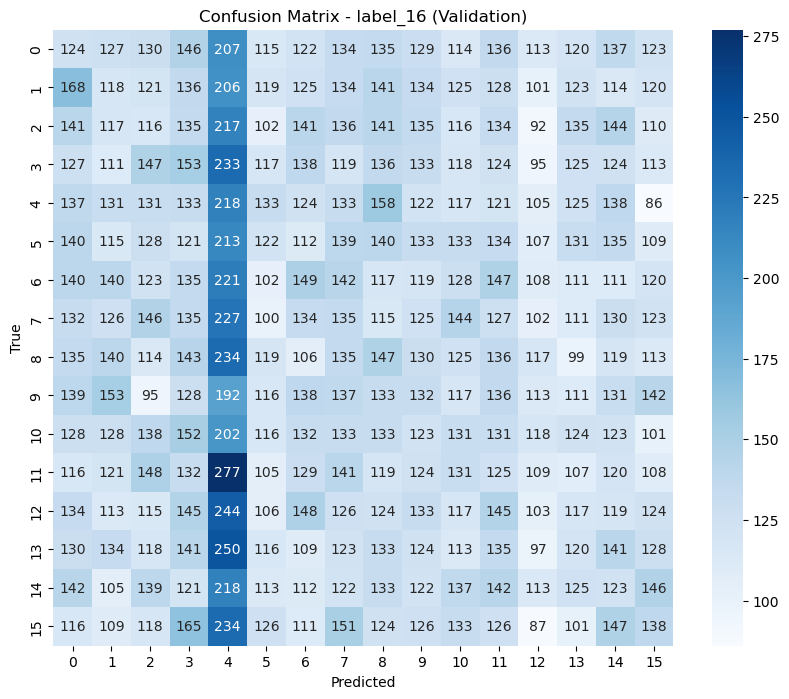


Test Set - label_16
  Accuracy: 0.0624
  Macro F1 Score: 0.0621
              precision    recall  f1-score   support

        enfj       0.06      0.07      0.06      2112
        enfp       0.05      0.05      0.05      2112
        entj       0.06      0.06      0.06      2113
        entp       0.06      0.07      0.06      2112
        esfj       0.06      0.10      0.07      2113
        esfp       0.06      0.05      0.06      2113
        estj       0.07      0.06      0.06      2112
        estp       0.06      0.06      0.06      2113
        infj       0.07      0.06      0.07      2113
        infp       0.06      0.06      0.06      2112
        intj       0.07      0.06      0.06      2112
        intp       0.07      0.07      0.07      2113
        isfj       0.06      0.05      0.06      2112
        isfp       0.06      0.06      0.06      2113
        istj       0.06      0.06      0.06      2112
        istp       0.06      0.05      0.06      2113

    accuracy   

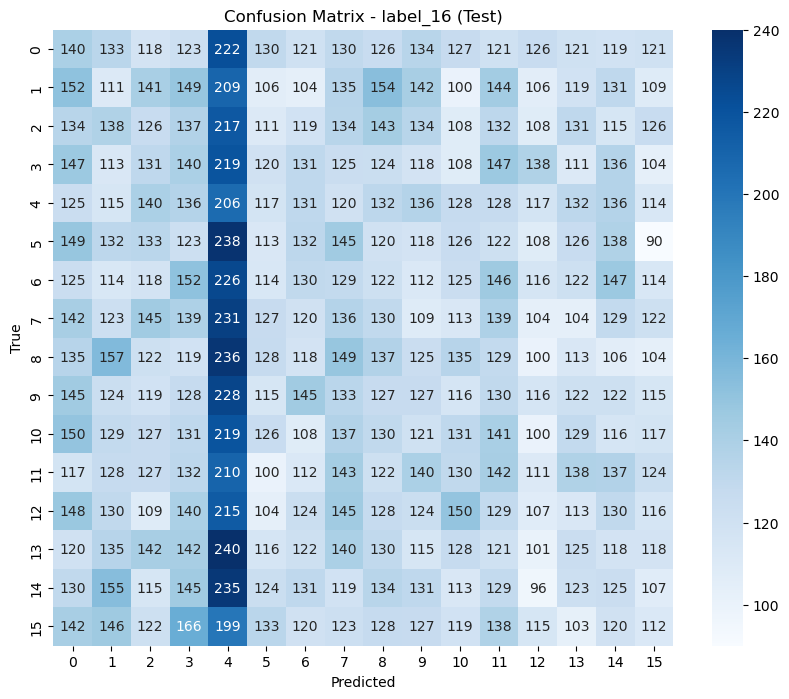

In [105]:
label_encoder = joblib.load('label_encoder.joblib')
for split_name, X_split, y_true in [("Validation", X_val, y16_val), ("Test", X_test, y16_test)]:

    y_true_labels = label_encoder.inverse_transform(y_true)
    y_pred_labels = label_encoder.inverse_transform(lr_16.predict(X_split))

    acc = accuracy_score(y_true_labels, y_pred_labels)
    f1 = f1_score(y_true_labels, y_pred_labels, average='macro')
    
    print(f"\n{split_name} Set - label_16")
    print(f"  Accuracy: {acc:.4f}")
    print(f"  Macro F1 Score: {f1:.4f}")
    print(classification_report(y_true_labels, y_pred_labels))


    plt.figure(figsize=(10, 8))
    sns.heatmap(confusion_matrix(y_true_labels, y_pred_labels), annot=True, fmt="d", cmap="Blues")
    plt.title(f"Confusion Matrix - label_16 ({split_name})")
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.show()

#### Label - 4


Validation Set - label_4
  [E] Accuracy: 0.5025
              precision    recall  f1-score   support

           0       0.50      0.48      0.49     16900
           1       0.50      0.53      0.52     16899

    accuracy                           0.50     33799
   macro avg       0.50      0.50      0.50     33799
weighted avg       0.50      0.50      0.50     33799



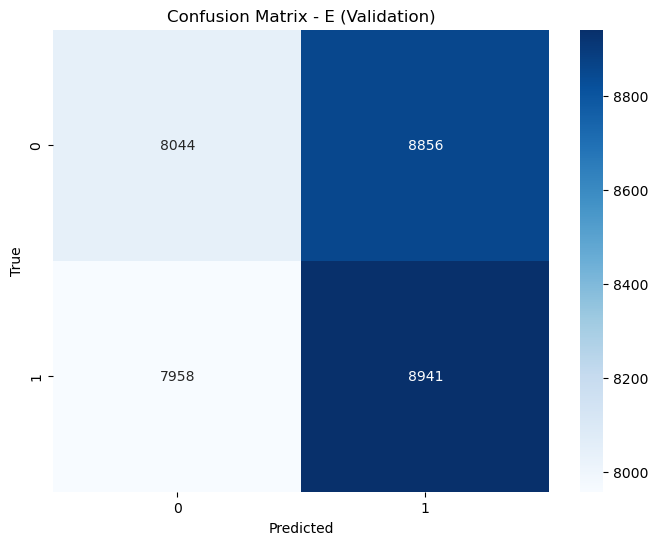

  [N] Accuracy: 0.5043
              precision    recall  f1-score   support

           0       0.50      0.53      0.52     16899
           1       0.50      0.48      0.49     16900

    accuracy                           0.50     33799
   macro avg       0.50      0.50      0.50     33799
weighted avg       0.50      0.50      0.50     33799



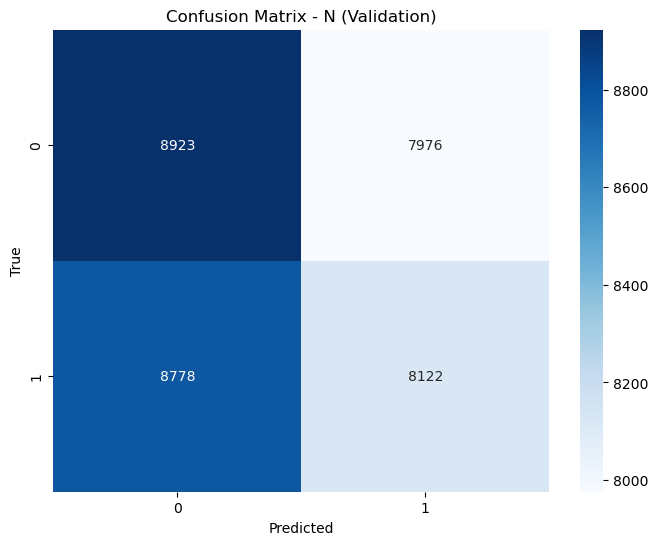

  [T] Accuracy: 0.5046
              precision    recall  f1-score   support

           0       0.50      0.47      0.49     16899
           1       0.50      0.53      0.52     16900

    accuracy                           0.50     33799
   macro avg       0.50      0.50      0.50     33799
weighted avg       0.50      0.50      0.50     33799



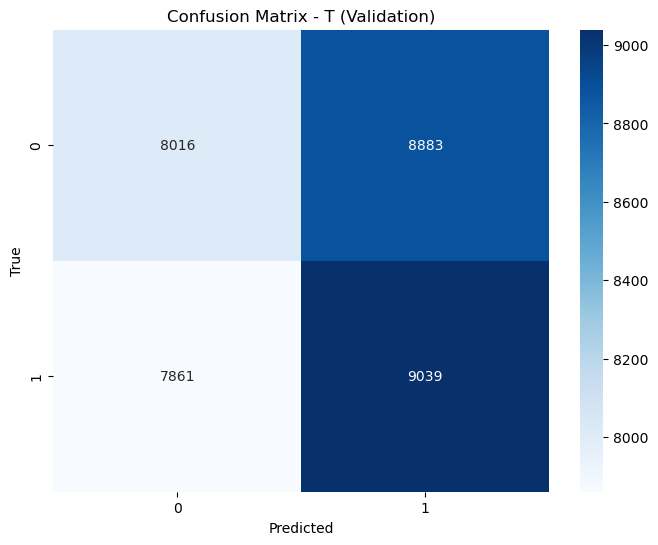

  [P] Accuracy: 0.5009
              precision    recall  f1-score   support

           0       0.50      0.47      0.49     16900
           1       0.50      0.53      0.51     16899

    accuracy                           0.50     33799
   macro avg       0.50      0.50      0.50     33799
weighted avg       0.50      0.50      0.50     33799



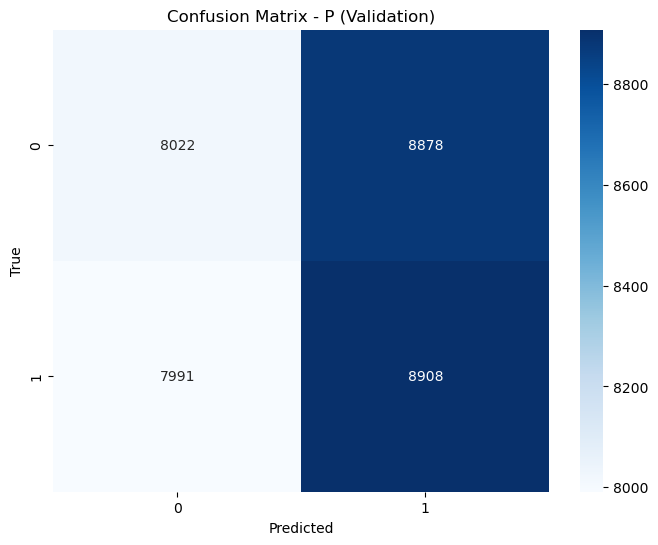


Test Set - label_4
  [E] Accuracy: 0.4980
              precision    recall  f1-score   support

           0       0.50      0.47      0.48     16900
           1       0.50      0.53      0.51     16900

    accuracy                           0.50     33800
   macro avg       0.50      0.50      0.50     33800
weighted avg       0.50      0.50      0.50     33800



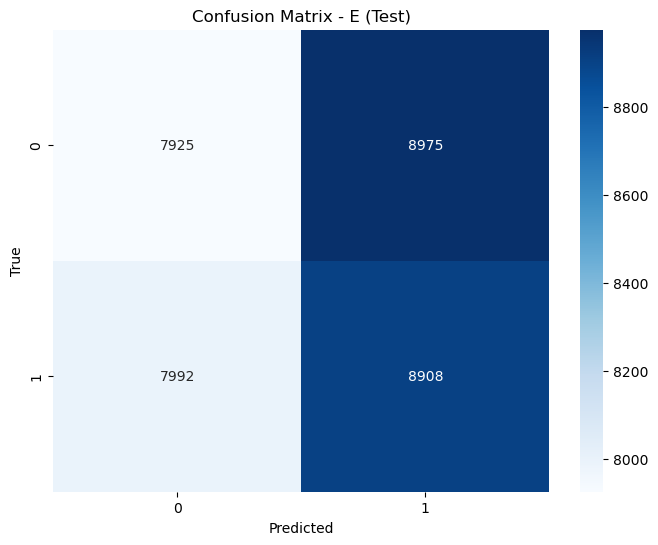

  [N] Accuracy: 0.4989
              precision    recall  f1-score   support

           0       0.50      0.53      0.51     16901
           1       0.50      0.47      0.49     16899

    accuracy                           0.50     33800
   macro avg       0.50      0.50      0.50     33800
weighted avg       0.50      0.50      0.50     33800



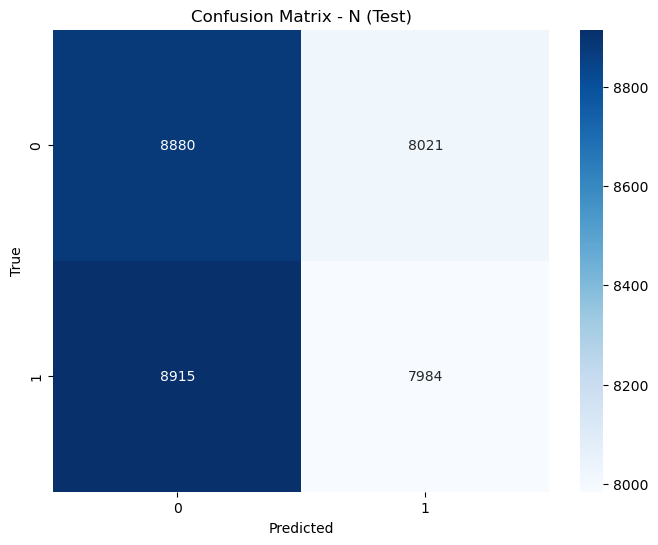

  [T] Accuracy: 0.5017
              precision    recall  f1-score   support

           0       0.50      0.48      0.49     16900
           1       0.50      0.53      0.51     16900

    accuracy                           0.50     33800
   macro avg       0.50      0.50      0.50     33800
weighted avg       0.50      0.50      0.50     33800



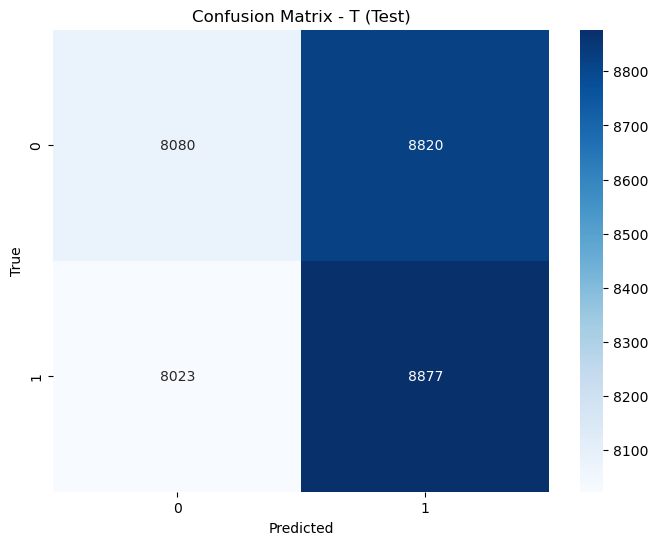

  [P] Accuracy: 0.4950
              precision    recall  f1-score   support

           0       0.49      0.47      0.48     16899
           1       0.50      0.52      0.51     16901

    accuracy                           0.49     33800
   macro avg       0.49      0.49      0.49     33800
weighted avg       0.49      0.49      0.49     33800



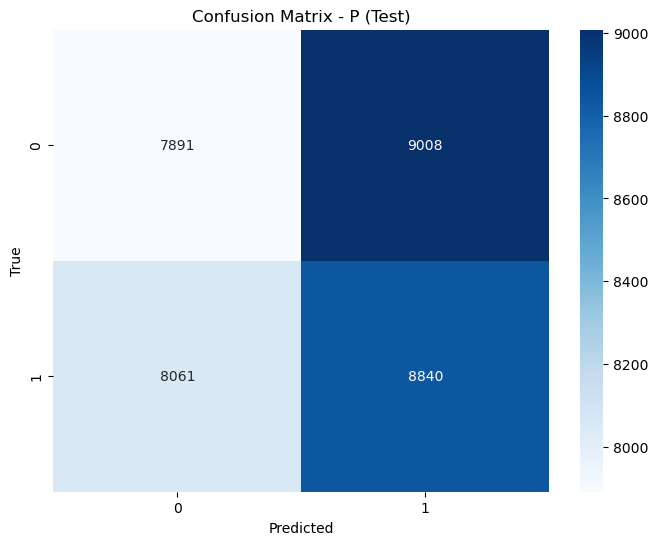

In [109]:
labels = ["E", "N", "T", "P"]

for split_name, X_split, y4_split in [("Validation", X_val, y4_val), ("Test", X_test, y4_test)]:
    print(f"\n{split_name} Set - label_4")
    y4_pred_bin = []
    for i in range(4):
        lr = LogisticRegression(
            solver='lbfgs',
            max_iter=500,
            class_weight='balanced',
            random_state=42
        )
        lr.fit(X_train, y4_train[:, i])
        prob = lr.predict_proba(X_split)[:, 1]
        y4_pred_bin.append((prob > 0.5).astype(int))

    y4_pred_bin = np.array(y4_pred_bin).T  # shape: (n_samples, 4)

    for i, label in enumerate(labels):
        acc = accuracy_score(y4_split[:, i], y4_pred_bin[:, i])
        print(f"  [{label}] Accuracy: {acc:.4f}")
        print(classification_report(y4_split[:, i], y4_pred_bin[:, i]))

        plt.figure(figsize=(8, 6))
        cm = confusion_matrix(y4_split[:, i], y4_pred_bin[:, i])
        sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
        plt.title(f"Confusion Matrix - {label} ({split_name})")
        plt.xlabel("Predicted")
        plt.ylabel("True")
        plt.show()